In [3]:

#importing required libraries
from skimage.io import imread, imshow
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure
import matplotlib.pyplot as plt
from scipy.spatial import distance
from skimage import filters
from skimage.color import rgb2hsv, rgb2gray, gray2rgb
%matplotlib inline

dimx=160
dimy=90
nPixels=16
nCells=2
nOrients=8




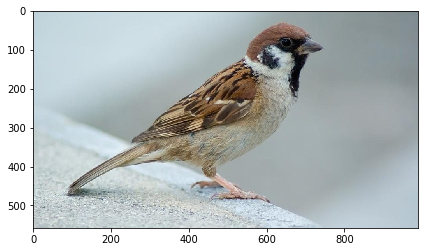

In [4]:
img = imread('/home/fher/Documentos/Curso CIBR/CIBR-Aves/gorrion3.jpg')
imshow(img)

(90, 160, 3)


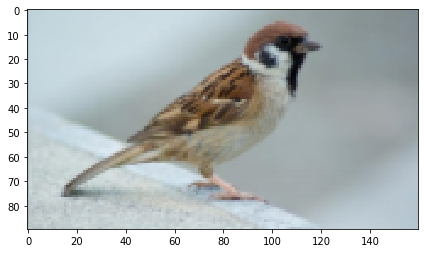

In [5]:
#resizing image 
resized_img = resize(img, (dimy,dimx)) 

#Revertir imagen
#resized_img=resized_img[:,::-1,:]
imshow(resized_img)         
print(resized_img.shape)


In [7]:
fd, hog_image = hog(resized_img, orientations=nOrients, pixels_per_cell=(nPixels, nPixels), 
                    cells_per_block=(nCells, nCells), visualize=True, multichannel=True)
len(fd)

1152

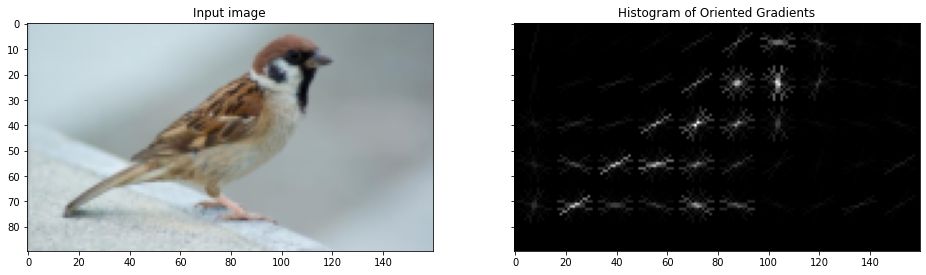

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), sharex=True, sharey=True) 

ax1.imshow(resized_img, cmap=plt.cm.gray) 
ax1.set_title('Input image') 

# Rescale histogram for better display 
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10)) 

ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray) 
ax2.set_title('Histogram of Oriented Gradients')

plt.show()

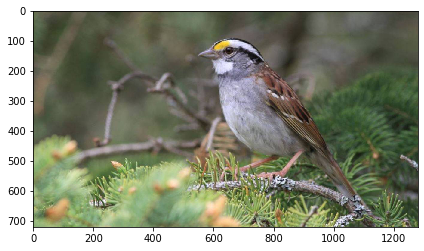

In [9]:
img2 = imread('/home/fher/Documentos/Curso CIBR/CIBR-Aves/Imagenes/gorrion/gorrion5.jpg')
imshow(img2)

(90, 160, 3)


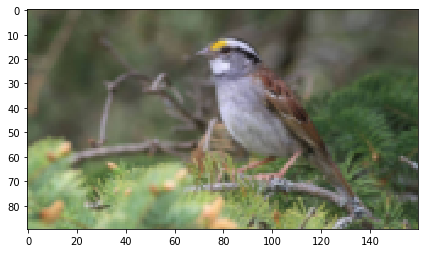

In [10]:
resized_img2 = resize(img2, (dimy,dimx)) 
#Convertir a hsv
#hsv_img = rgb2hsv(resized_img2)
#imshow(hsv_img)  
imshow(resized_img2) 
print(resized_img2.shape)


In [11]:
fd2, hog_image2 = hog(resized_img2, orientations=nOrients, pixels_per_cell=(nPixels, nPixels), 
                    cells_per_block=(nCells, nCells), visualize=True, multichannel=True)
len(fd2)


1152

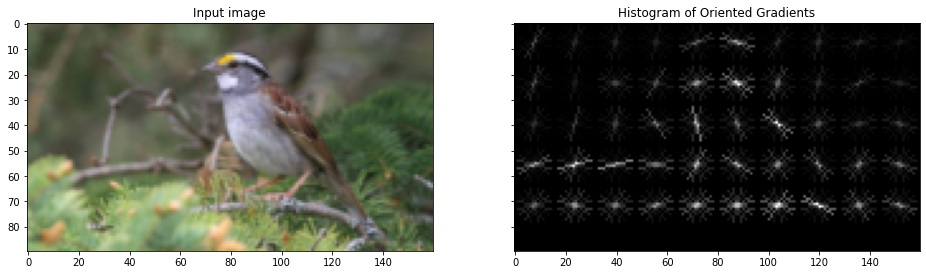

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), sharex=True, sharey=True) 

ax1.imshow(resized_img2, cmap=plt.cm.gray) 
ax1.set_title('Input image') 

# Rescale histogram for better display 
hog_image_rescaled2 = exposure.rescale_intensity(hog_image2, in_range=(0, 10)) 

ax2.imshow(hog_image_rescaled2, cmap=plt.cm.gray) 
ax2.set_title('Histogram of Oriented Gradients')

plt.show()


In [17]:
imgGray = rgb2gray(img2)
edge_roberts = filters.roberts(imgGray)

In [18]:
distance.minkowski(fd, fd2, 2)

4.465425088447983

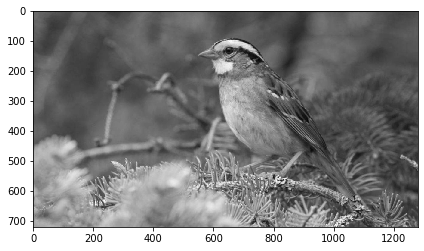

In [19]:
imgGray = rgb2gray(img2)
imshow(imgGray)

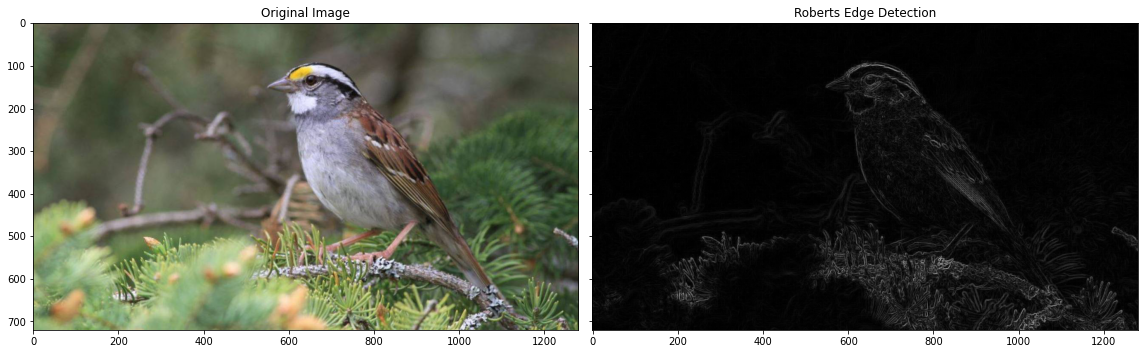

In [20]:
edge_roberts = filters.roberts(imgGray)
fig, axes = plt.subplots(ncols=2, sharex=True, sharey=True,
                         figsize=(16, 8))
axes[0].imshow(img2, cmap=plt.cm.gray)
axes[0].set_title('Original Image')
axes[1].imshow(edge_roberts, cmap=plt.cm.gray)
axes[1].set_title('Roberts Edge Detection')
plt.tight_layout()
plt.show()

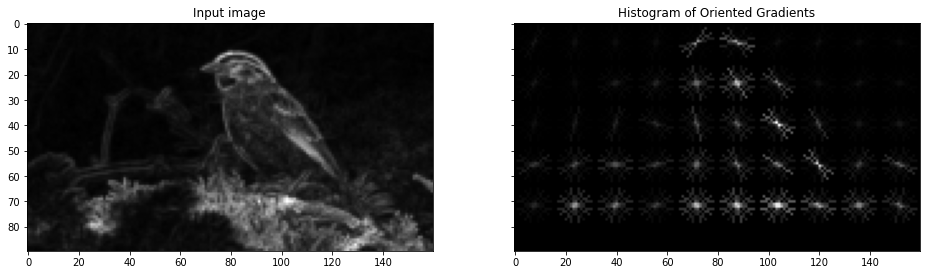

In [21]:
resized_img2 = resize(edge_roberts, (dimy,dimx))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), sharex=True, sharey=True) 

ax1.imshow(resized_img2, cmap=plt.cm.gray) 
ax1.set_title('Input image') 
fd2, hog_image2 = hog(gray2rgb(resized_img2), orientations=nOrients, pixels_per_cell=(nPixels, nPixels), 
                    cells_per_block=(nCells, nCells), visualize=True, multichannel=True)

# Rescale histogram for better display 
hog_image_rescaled2 = exposure.rescale_intensity(hog_image2, in_range=(0, 10)) 

ax2.imshow(hog_image_rescaled2, cmap=plt.cm.gray) 
ax2.set_title('Histogram of Oriented Gradients')

plt.show()